In [52]:
import numpy as np
import pandas as pd
import os
from scipy import stats
np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
HOUSING_DATA = r"C:\Users\hcars\ML\housing.csv"
attrib = ["CRIM", "ZN","INDUS", "CHAS", "NOX", "RM",
                                             "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
def load_data(housing_path = HOUSING_DATA):
    return pd.read_csv(housing_path, delim_whitespace = True, names = attrib);
housing = load_data()
housing = housing.drop("B", axis  = 1)
z = np.abs(stats.zscore(housing))
housing = housing[(z < 3.7).all(axis = 1)]
# want to figure out how to remove all outliers except chas
housing.head()
#housing.hist(bins=75, figsize=(20,15))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 505
Data columns (total 13 columns):
CRIM       495 non-null float64
ZN         495 non-null float64
INDUS      495 non-null float64
CHAS       495 non-null int64
NOX        495 non-null float64
RM         495 non-null float64
AGE        495 non-null float64
DIS        495 non-null float64
RAD        495 non-null int64
TAX        495 non-null float64
PTRATIO    495 non-null float64
LSTAT      495 non-null float64
MEDV       495 non-null float64
dtypes: float64(11), int64(2)
memory usage: 54.1 KB


In [54]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,2.785858,11.232323,11.048424,0.070707,0.553007,6.296667,68.239192,3.809195,9.305051,404.305051,18.433535,12.538364,22.710707
std,5.100031,22.918500,6.845285,0.256594,0.115487,0.690796,28.169584,2.064285,8.576512,166.328859,2.169873,7.005169,9.105281
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,188.000000,12.600000,1.730000,5.600000
25%,0.081930,0.000000,5.160000,0.000000,0.449000,5.888500,44.700000,2.115300,4.000000,279.000000,17.350000,6.925000,17.200000
50%,0.249800,0.000000,8.560000,0.000000,0.538000,6.211000,76.700000,3.272100,5.000000,330.000000,19.000000,11.320000,21.200000
75%,3.043800,12.500000,18.100000,0.000000,0.624000,6.622000,93.900000,5.213250,8.000000,666.000000,20.200000,16.695000,25.000000
max,28.655800,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,37.970000,50.000000


In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(housing, test_size = .2, random_state = 42)
test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
467,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666.0,20.2,21.32,19.1
74,0.07896,0.0,12.83,0,0.437,6.273,6.0,4.2515,5,398.0,18.7,6.78,24.1
311,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304.0,18.4,5.98,22.1
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296.0,16.6,10.11,23.2
334,0.03738,0.0,5.19,0,0.515,6.310,38.5,6.4584,5,224.0,20.2,6.75,20.7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002297A33FB70>,
      dtype=object)

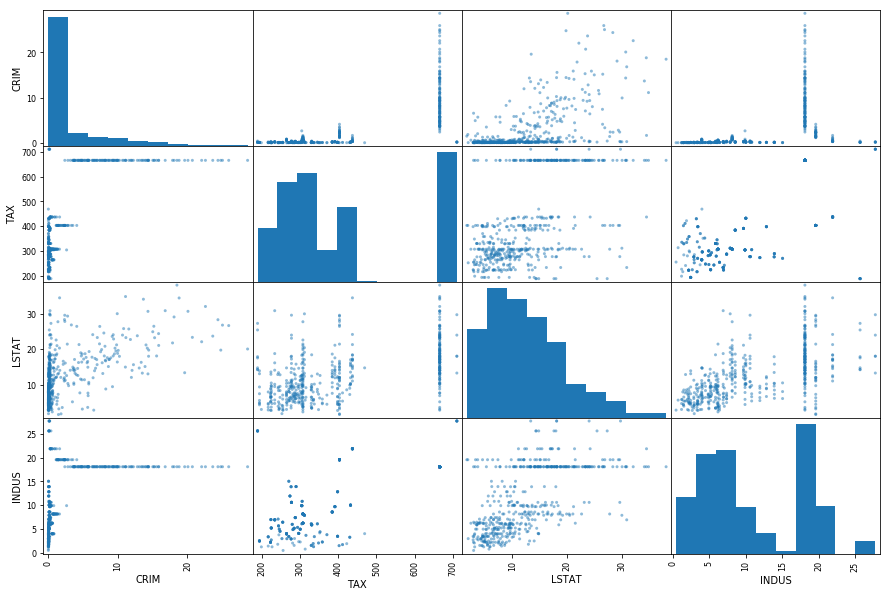

In [37]:
visual = train.copy()
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["CRIM","TAX","LSTAT", "INDUS"]], figsize=(15, 10))

In [56]:
corr = train.corr()
corr["TAX"].sort_values(ascending= False)

TAX        1.000000
RAD        0.913621
CRIM       0.756058
INDUS      0.704907
NOX        0.645698
LSTAT      0.507065
AGE        0.480127
PTRATIO    0.461086
CHAS      -0.025249
RM        -0.272369
ZN        -0.299562
MEDV      -0.447370
DIS       -0.506771
Name: TAX, dtype: float64

In [61]:
ready_training = train.drop("TAX", axis = 1)
labels = train["TAX"].copy()

In [62]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(ready_training, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)